<a href="https://colab.research.google.com/github/Noziepretty98/Noziepretty98/blob/main/STUDENT_PERFOMANCE_PREDICTIONE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

## To identify factors that affect student performance in exams.

1. gender: sex of the students
2. race/ethnicity: ethnicity of the students
3. parental level of education: parents' final education
4. lunch: type of lunch before the test (normal or abnormal)
5. test preparation course: whether the test preparation course was completed or not
6. exam_score: the students' scores on the exam

IMPORTING LIBRARIES

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

LOAD THE DATASET

In [56]:
df = pd.read_csv('/content/StudentsPerformance.csv')

#Exploratory Data Analysis (EDA)
Load the dataset and understand its structure, types, and basic statistics.

In [57]:
# Display the first few rows of the dataset
print(df.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [58]:
# Display summary statistics
print(df.describe())

       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


In [59]:
# Display information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


In [60]:
# Check for missing values
print(df.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [61]:
# Create a new column for the average exam score
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

# Display the first few rows to check the new column
print(df.head())


   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   average_score  
0      72.666667  
1      82.333333  
2      92.666667  
3      49.333333  
4      76.333333  


## Now to gain insights into the data, understand patterns, relationships, and distributions, and identify any potential outliers lets create visuals

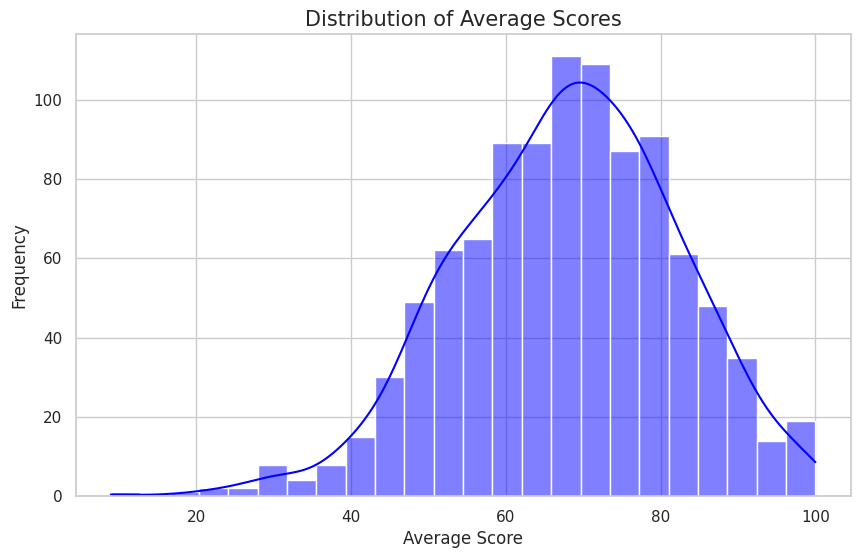

In [62]:
## Set the style and color palette
sns.set(style="whitegrid")
color = "blue"

# Visualize the distribution of average scores
plt.figure(figsize=(10, 6))
sns.histplot(df['average_score'], kde=True, color=color)
plt.title('Distribution of Average Scores', fontsize=15)
plt.xlabel('Average Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


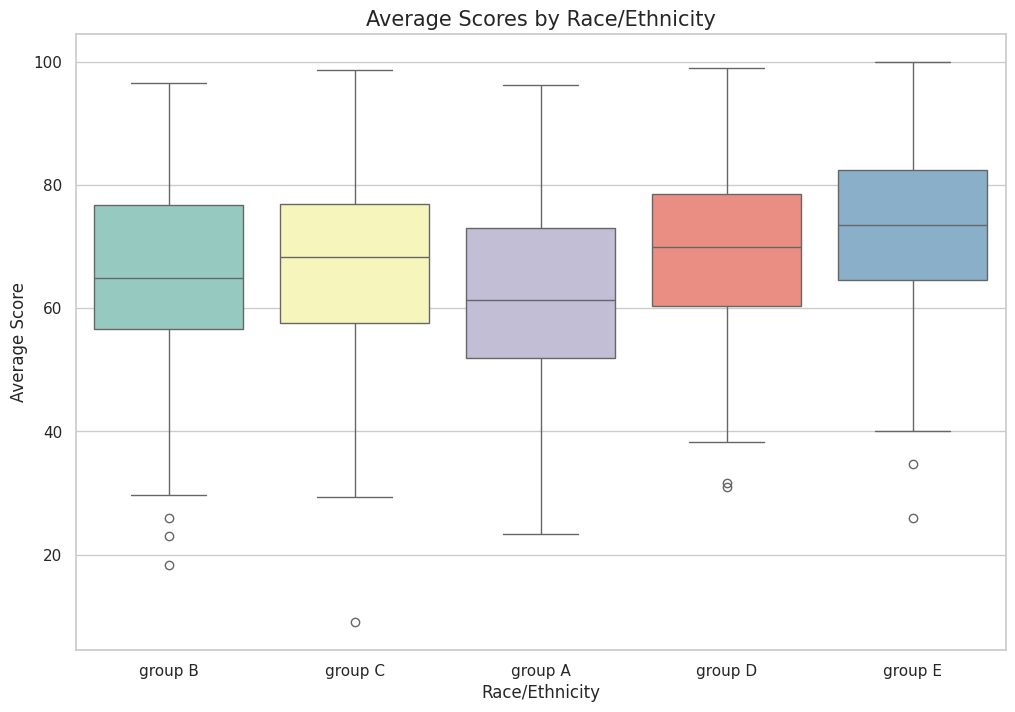

In [63]:
# Box plot to show the distribution of average scores by race/ethnicity
plt.figure(figsize=(12, 8))
sns.boxplot(x='race/ethnicity', y='average_score', data=df, hue='race/ethnicity', palette="Set3", legend=False)
plt.title('Average Scores by Race/Ethnicity', fontsize=15)
plt.xlabel('Race/Ethnicity', fontsize=12)
plt.ylabel('Average Score', fontsize=12)
plt.show()


<ipython-input-64-96626dff176a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='parental level of education', y='average_score', data=df, palette=custom_palette, estimator=np.mean)


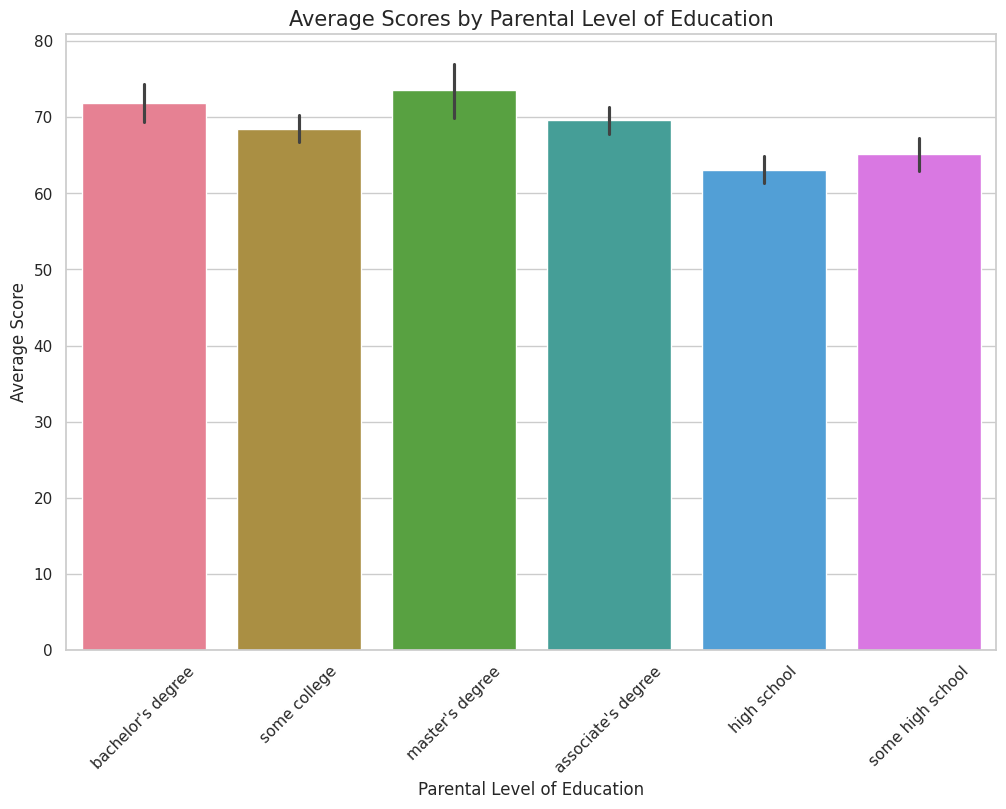

In [64]:
# Define a custom color palette
custom_palette = sns.color_palette("husl", 6)  # Using a palette with 6 colors

# Bar plot to show the average scores by parental level of education
plt.figure(figsize=(12, 8))
sns.barplot(x='parental level of education', y='average_score', data=df, palette=custom_palette, estimator=np.mean)
plt.title('Average Scores by Parental Level of Education', fontsize=15)
plt.xlabel('Parental Level of Education', fontsize=12)
plt.ylabel('Average Score', fontsize=12)
plt.xticks(rotation=45)
plt.show()


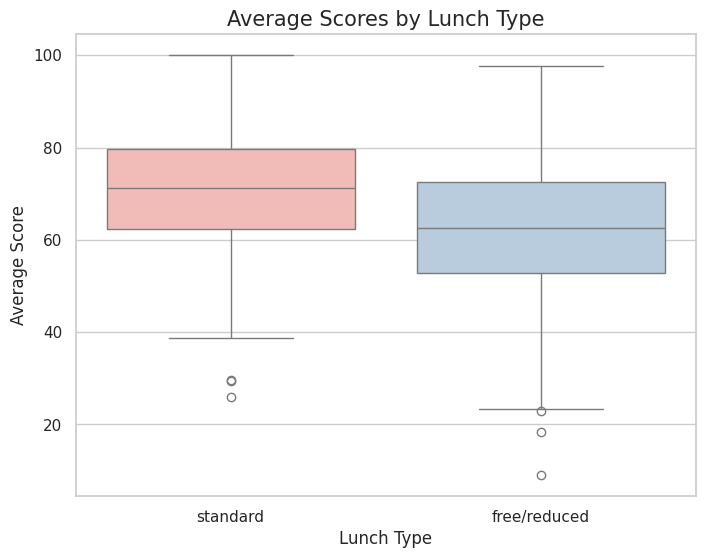

In [65]:
# Box plot to show the distribution of average scores by lunch type
plt.figure(figsize=(8, 6))
sns.boxplot(x='lunch', y='average_score', data=df, hue='lunch', palette="Pastel1", legend=False)
plt.title('Average Scores by Lunch Type', fontsize=15)
plt.xlabel('Lunch Type', fontsize=12)
plt.ylabel('Average Score', fontsize=12)
plt.show()


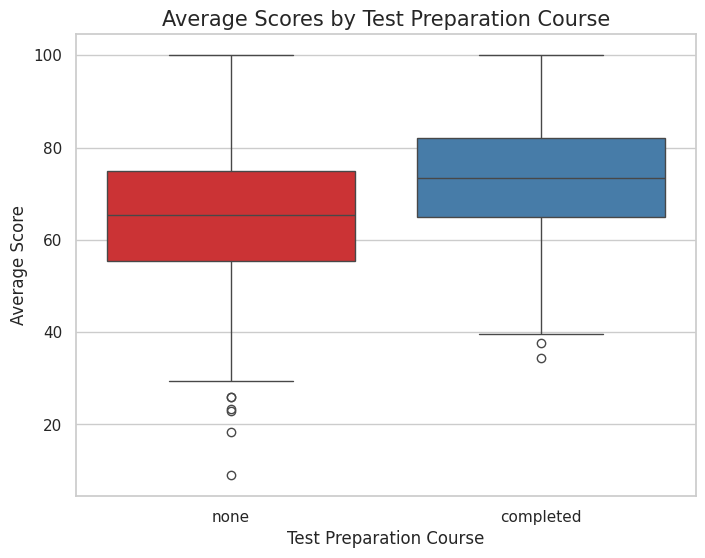

In [66]:
# Box plot to show the distribution of average scores by test preparation course
plt.figure(figsize=(8, 6))
sns.boxplot(x='test preparation course', y='average_score', data=df, hue='test preparation course', palette="Set1", legend=False)
plt.title('Average Scores by Test Preparation Course', fontsize=15)
plt.xlabel('Test Preparation Course', fontsize=12)
plt.ylabel('Average Score', fontsize=12)
plt.show()




#Feature Engineering
focus on identifying and engineering relevant features, encoding and scaling them as needed for your project on student performance prediction.

In [67]:
# Example: Creating a feature for total score
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']

# Example: Creating a feature for average score
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

# Example: Feature interaction (if relevant)
df['interaction_score'] = df['math score'] * df['reading score']


 Encoding and Scaling Features
Ensure categorical variables are encoded properly and numerical features are scaled appropriately for models.

In [68]:

# Perform one-hot encoding on categorical variables
df = pd.get_dummies(df, columns=['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'], drop_first=True)


 StandardScaler from sklearn.preprocessing to standardize (or scale) the numerical features in the DataFrame df.

In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['math score', 'reading score', 'writing score']
df[numerical_features] = scaler.fit_transform(df[numerical_features])


# looks like after performing various operations such as feature engineering, encoding, and scaling

In [70]:
print(df.head())


   math score  reading score  writing score  average_score  total_score  \
0    0.390024       0.193999       0.391492      72.666667          218   
1    0.192076       1.427476       1.313269      82.333333          247   
2    1.577711       1.770109       1.642475      92.666667          278   
3   -1.259543      -0.833899      -1.583744      49.333333          148   
4    0.653954       0.605158       0.457333      76.333333          229   

   interaction_score  gender_male  race/ethnicity_group B  \
0               5184        False                    True   
1               6210        False                   False   
2               8550        False                    True   
3               2679         True                   False   
4               5928         True                   False   

   race/ethnicity_group C  race/ethnicity_group D  race/ethnicity_group E  \
0                   False                   False                   False   
1                    True   

In [71]:
print(df.describe())


         math score  reading score  writing score  average_score  total_score  \
count  1.000000e+03   1.000000e+03   1.000000e+03    1000.000000  1000.000000   
mean   8.704149e-17   2.167155e-16  -1.350031e-16      67.770667   203.312000   
std    1.000500e+00   1.000500e+00   1.000500e+00      14.257326    42.771978   
min   -4.360728e+00  -3.574960e+00  -3.822345e+00       9.000000    27.000000   
25%   -5.997164e-01  -6.968462e-01  -6.784278e-01      58.333333   175.000000   
50%   -5.872457e-03   5.694554e-02   6.228578e-02      68.333333   205.000000   
75%    7.199368e-01   6.736842e-01   7.206978e-01      77.666667   233.000000   
max    2.237538e+00   2.112741e+00   2.103363e+00     100.000000   300.000000   

       interaction_score  
count        1000.000000  
mean         4752.128000  
std          1888.169874  
min             0.000000  
25%          3355.000000  
50%          4623.500000  
75%          6000.000000  
max         10000.000000  


In [72]:
print(df.columns)


Index(['math score', 'reading score', 'writing score', 'average_score',
       'total_score', 'interaction_score', 'gender_male',
       'race/ethnicity_group B', 'race/ethnicity_group C',
       'race/ethnicity_group D', 'race/ethnicity_group E',
       'parental level of education_bachelor's degree',
       'parental level of education_high school',
       'parental level of education_master's degree',
       'parental level of education_some college',
       'parental level of education_some high school', 'lunch_standard',
       'test preparation course_none'],
      dtype='object')


#Model Building

In [73]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop(['average_score'], axis=1)  # Features
y = df['average_score']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Linear Regression
Linear Regression is a simple and commonly used regression technique that assumes a linear relationship between the input variables (features) and the target variable (average score

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize Linear Regression model
linear_regression_model = LinearRegression()

# Train the model
linear_regression_model.fit(X_train, y_train)

# Make predictions
y_pred_linear_regression = linear_regression_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse_linear_regression = mean_squared_error(y_test, y_pred_linear_regression)

# Calculate R-squared score
r2_linear_regression = r2_score(y_test, y_pred_linear_regression)

# Print results
print(f"Linear Regression Mean Squared Error: {mse_linear_regression}")
print(f"Linear Regression R-squared score: {r2_linear_regression}")


Linear Regression Mean Squared Error: 1.2964140116402108e-28
Linear Regression R-squared score: 1.0


#Random Forest Model Evaluation

builds multiple decision trees (forest) and averages their predictions to improve generalizability and reduce overfitting.

In [75]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize Random Forest model
random_forest_model = RandomForestRegressor(random_state=42)

# Train the model
random_forest_model.fit(X_train, y_train)

# Make predictions
y_pred_random_forest = random_forest_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)

# Calculate R-squared score
r2_random_forest = r2_score(y_test, y_pred_random_forest)

# Print results
print(f"Random Forest Mean Squared Error: {mse_random_forest}")
print(f"Random Forest R-squared score: {r2_random_forest}")


Random Forest Mean Squared Error: 0.8135179444444434
Random Forest R-squared score: 0.9962050148160023


To determine the best model, I considered not just the performance metrics (like MSE and R-squared) but also how well the model generalizes to unseen data, its interpretability, and the complexity of the model

cross-validation for both models to evaluate their performance more robustly:

In [76]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Linear Regression
linear_regression_model = LinearRegression()
linear_regression_cv_scores = cross_val_score(linear_regression_model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Linear Regression Cross-Validation MSE: {-linear_regression_cv_scores.mean()}")

# Cross-validation for Random Forest
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_cv_scores = cross_val_score(random_forest_model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Random Forest Cross-Validation MSE: {-random_forest_cv_scores.mean()}")


Linear Regression Cross-Validation MSE: 2.6632259704623446e-28
Random Forest Cross-Validation MSE: 0.16935321111111085


#Feature Importance:

For the Random Forest model, check the feature importance to understand which features are driving the predictions

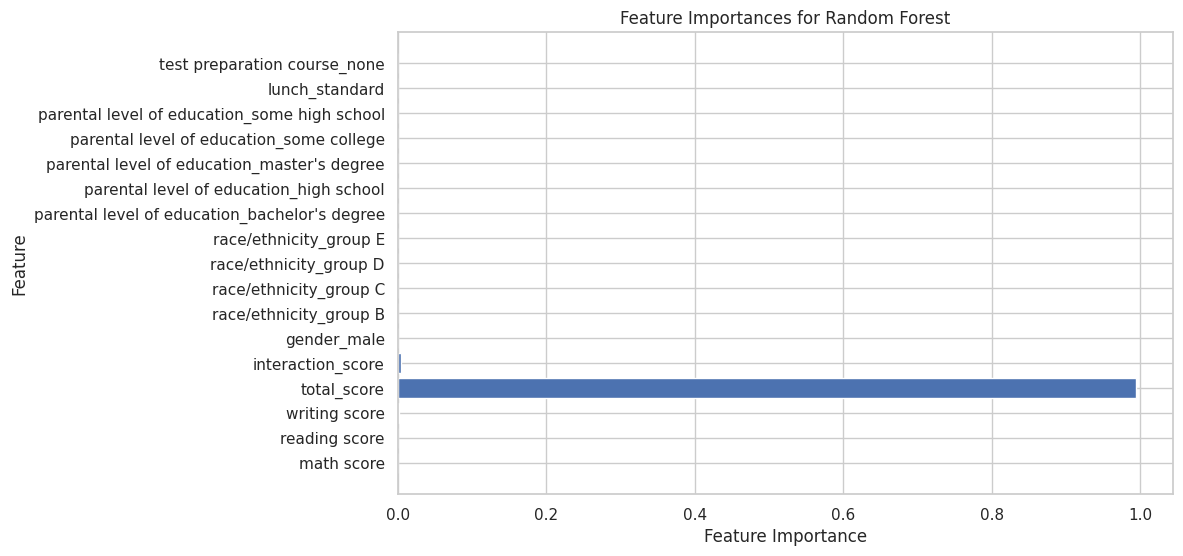

In [77]:

# Train Random Forest model
random_forest_model.fit(X_train, y_train)

# Get feature importances
feature_importances = random_forest_model.feature_importances_
features = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for Random Forest')
plt.show()


#Hyperparameter Tuning:

Perform hyperparameter tuning to optimize the performance of the Random Forest model.

In [78]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best parameters: {best_params}")
print(f"Best Random Forest model MSE: {-grid_search.best_score_}")


Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best Random Forest model MSE: 0.1288697916666663


#Residual Analysis

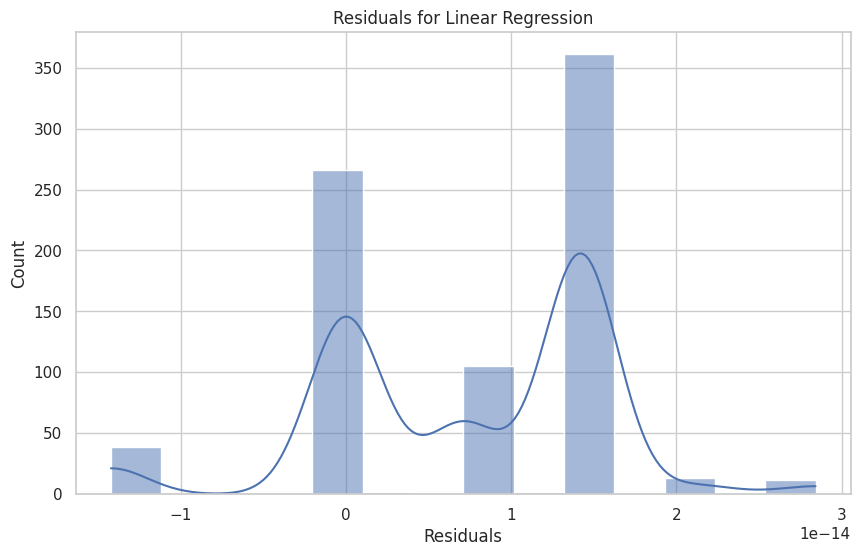

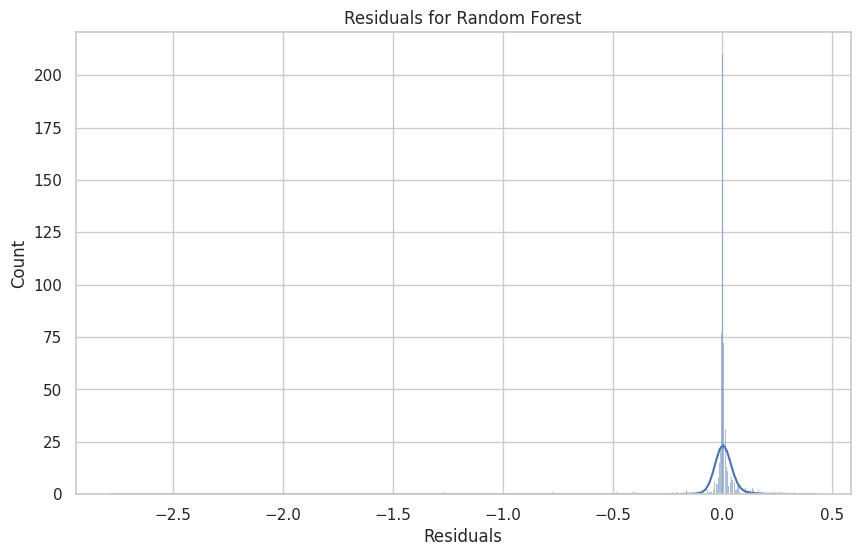

In [80]:
import seaborn as sns

# Fit the Linear Regression model
linear_regression_model.fit(X_train, y_train)
# Predict on the training set
y_train_pred_linear = linear_regression_model.predict(X_train)
# Calculate residuals for Linear Regression
residuals_linear = y_train - y_train_pred_linear

plt.figure(figsize=(10, 6))
sns.histplot(residuals_linear, kde=True)
plt.xlabel('Residuals')
plt.title('Residuals for Linear Regression')
plt.show()

# Fit the Random Forest model
random_forest_model.fit(X_train, y_train)
# Predict on the training set
y_train_pred_rf = random_forest_model.predict(X_train)
# Calculate residuals for Random Forest
residuals_rf = y_train - y_train_pred_rf

plt.figure(figsize=(10, 6))
sns.histplot(residuals_rf, kde=True)
plt.xlabel('Residuals')
plt.title('Residuals for Random Forest')
plt.show()
